# Week 1: Initialization and Histplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Pulkit\\2017 Class-XII\\Google Advanced Dara Analytics Professional Certificate\\4 - The Power of Statistics\\Datasets\\education_districtwise_2015_16.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    680 non-null    object 
 1   STATNAME    680 non-null    object 
 2   BLOCKS      680 non-null    int64  
 3   VILLAGES    680 non-null    int64  
 4   CLUSTERS    680 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.3+ KB
None


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,KUPWARA,JAMMU & KASHMIR,13,391,104,875564.0,66.92
1,BARAMULA,JAMMU & KASHMIR,18,678,144,1015503.0,66.93
2,SRINAGAR,JAMMU & KASHMIR,8,94,65,1269751.0,71.21
3,BADGAM,JAMMU & KASHMIR,13,523,104,735753.0,57.98
4,PULWAMA,JAMMU & KASHMIR,8,359,64,570060.0,65.00


In [3]:
df.describe(include = 'all')

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,680,680,680.000000,680.000000,680.000000,6.340000e+02,634.000000
unique,680,36,NaN,NaN,NaN,NaN,NaN
top,KUPWARA,UTTAR PRADESH,NaN,NaN,NaN,NaN,NaN
freq,1,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.760294,874.614706,121.226471,1.899024e+06,73.395189
std,NaN,NaN,9.585360,622.711657,94.040172,1.547475e+06,10.098460
min,NaN,NaN,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,NaN,NaN,5.000000,390.750000,56.750000,8.226940e+05,66.437500
50%,NaN,NaN,8.000000,785.500000,101.000000,1.564392e+06,73.490000
75%,NaN,NaN,13.000000,1204.250000,162.500000,2.587520e+06,80.815000


<AxesSubplot: >

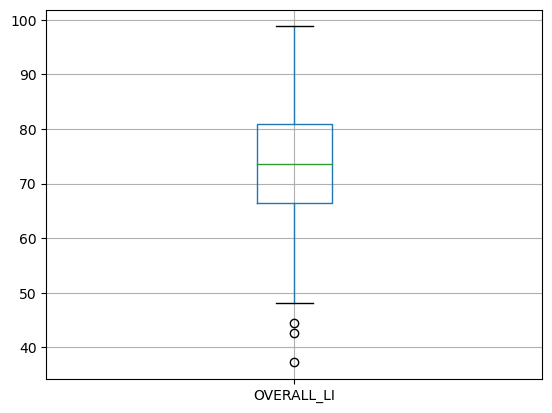

In [4]:
df.boxplot('OVERALL_LI')

In [10]:
df['OVERALL_LI'].max() - df['OVERALL_LI'].min()

61.540000000000006

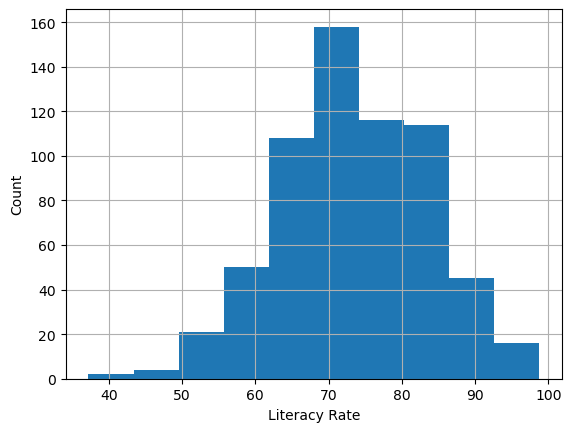

In [19]:
df['OVERALL_LI'].hist()
plt.xlabel('Literacy Rate')
plt.ylabel('Count')
plt.show()

Histogram is bell shaped and symmetric about the mean (73.4%) ie this is a normal distribution

In [33]:
print('Percent of observations within one Standard Deviation of mean = {:.2f}%'.format( 
    ( (df['OVERALL_LI'] > (df['OVERALL_LI'].mean() - df['OVERALL_LI'].std())) & 
      (df['OVERALL_LI'] < (df['OVERALL_LI'].mean() + df['OVERALL_LI'].std())) ).mean() * 100) )

Percent of observations within one Standard Deviation of mean = 61.91%


About 62% of observations lie within one Standard Deviation of mean which is close to the usual value of 68% for a normal distribution.

# Week 2: Z-score and Empherical rule

In [3]:
from scipy import stats
import statsmodels.api as sm

In [4]:
df2 = df.dropna().copy()
df2.columns = df2.columns.str.lower()
df2.head()

,distname,statname,blocks,villages,clusters,totpopulat,overall_li
0,KUPWARA,JAMMU & KASHMIR,13,391,104,875564.0,66.92
1,BARAMULA,JAMMU & KASHMIR,18,678,144,1015503.0,66.93
2,SRINAGAR,JAMMU & KASHMIR,8,94,65,1269751.0,71.21
3,BADGAM,JAMMU & KASHMIR,13,523,104,735753.0,57.98
4,PULWAMA,JAMMU & KASHMIR,8,359,64,570060.0,65.00


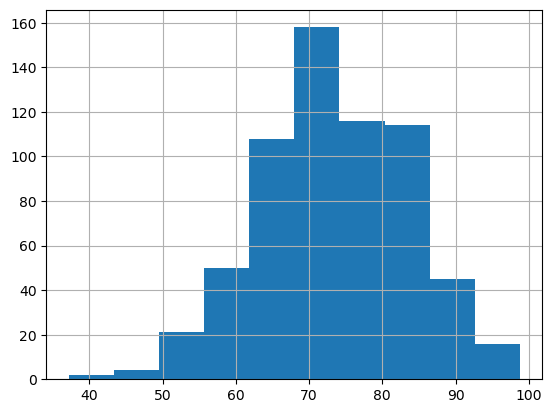

In [15]:
df2.overall_li.hist()
plt.show()

In [21]:
print('Percent of observations within one Standard Deviation of mean = {:.2f}%'.format( 
    ( (df2['overall_li'] > (df2['overall_li'].mean() - df2['overall_li'].std())) & 
      (df2['overall_li'] < (df2['overall_li'].mean() + df2['overall_li'].std())) ).mean() * 100) )

Percent of observations within one Standard Deviation of mean = 66.40%


In [5]:
df2['z_score'] = stats.zscore(df2.overall_li) #(df2.overall_li - df2.overall_li.mean()) / df2.overall_li.std()

In [28]:
df2[np.abs(df2.z_score) > 3]

,distname,statname,blocks,villages,clusters,totpopulat,overall_li,z_score
434,DANTEWADA,CHHATTISGARH,4,360,53,532791.0,42.67,-3.044964
494,ALIRAJPUR,MADHYA PRADESH,6,612,62,728677.0,37.22,-3.585076


Empherical Rule: 68% of observations fall within 1 std of the mean, 95% within 2 and 99.7% within 3.

This is verified for this dataset.

# Week 3: Samples and their distibution

In [5]:
sample_df = df2.sample(50, replace = True, random_state = 55)
sample_df.head()

,distname,statname,blocks,villages,clusters,totpopulat,overall_li
494,ALIRAJPUR,MADHYA PRADESH,6,612,62,728677.0,37.22
309,WEST KHASI HILLS,MEGHALAYA,4,806,73,385601.0,79.30
583,BAGALKOT,KARNATAKA,6,785,126,1890826.0,69.39
37,JALANDHAR,PUNJAB,11,982,156,2181753.0,82.40
366,PALAMU,JHARKHAND,20,1634,144,1936319.0,65.50


In [6]:
sample_df.overall_li.mean()

71.04679999999999

In [15]:
df2.sample(50, replace = True, random_state = 66).overall_li.mean()

74.79140000000001

In [27]:
sample_dist = np.zeros(10000)
for i in range(10000):
    rn = np.random.randint(10000)
    sample_dist[i] = df2.sample(50, replace = True, random_state = rn).overall_li.mean()

sample_estimate = pd.DataFrame(sample_dist)

In [50]:
sample_est_mean = sample_estimate[0].mean()
sample_est_mean

73.39441460000022

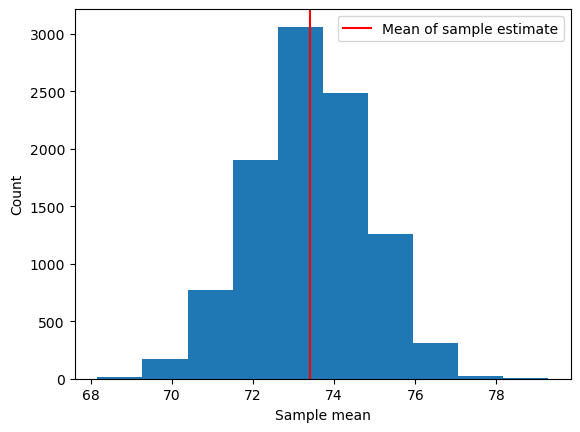

In [49]:
plt.hist(sample_estimate)
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.axvline(x = sample_est_mean, color = 'r', label = 'Mean of sample estimate');
plt.legend();

Thus we see that the men of sampling distribution is roughly equal to the population mean and follows a normal distribution.

# Week 4: Calculate confidence intervals for samples

In [15]:
print("95% Confidence Interval for Mean Literacy Rate: [{:.2f}%, {:.2f}%]".format(
                     sample_df.overall_li.mean()  - 1.96 * sample_df.overall_li.std()/np.sqrt(sample_df.shape[0]), 
                     sample_df.overall_li.mean()  + 1.96 * sample_df.overall_li.std()/np.sqrt(sample_df.shape[0]) ) )

95% Confidence Interval for Mean Literacy Rate: [67.57%, 74.53%]


In [23]:
CI_99 = stats.norm.interval(confidence = 0.99, loc = sample_df.overall_li.mean(), 
                            scale = sample_df.overall_li.std()/np.sqrt(sample_df.shape[0]))
print("99% Confidence Interval for Mean Literacy Rate: [{:.2f}%, {:.2f}%]".format(CI_99[0], CI_99[1]))

99% Confidence Interval for Mean Literacy Rate: [66.47%, 75.62%]


### Definition of Confidence Intervals
95% CI means that if we take repeated random samples from a popualation, then constuct the CI for each sample using same method, then we can expect the 95% of these intervals will contain the population parameter.

Read further on CI including t-scores
Like: https://www.scribbr.com/statistics/t-distribution/

# Week 5: Conduct two sample hypothesis test

In [17]:
#df2.groupby('statname')['distname'].count().sort_values(ascending = False)
df2.groupby('statname').agg(Dist_count = ('distname', 'count'), LR_mean = ('overall_li', np.mean)).sort_values('Dist_count', ascending = False)

,Dist_count,LR_mean
statname,,
UTTAR PRADESH,71,69.487183
MADHYA PRADESH,50,68.978400
BIHAR,38,63.778947
MAHARASHTRA,35,81.204857
RAJASTHAN,33,65.507273
KARNATAKA,30,73.798333
TAMIL NADU,30,79.848333
ASSAM,27,73.204815
ODISHA,27,70.844074


In [21]:
UP_df = df2[df2['statname'] == 'UTTAR PRADESH']
Bi_df = df2[df2['statname'] == 'BIHAR']

In [41]:
UP_sample = UP_df.sample(20, random_state = 481, replace = True)
Bi_sample = Bi_df.sample(20, random_state = 234, replace = True)

In [42]:
UP_sample.overall_li.mean()

68.9515

In [43]:
#stats.zscore(Bi_sample.overall_li)
Bi_sample.overall_li.mean()

63.607499999999995

In [45]:
UP_sample.overall_li.mean() - Bi_sample.overall_li.mean()

5.344000000000001

In [46]:
stats.ttest_ind(UP_sample.overall_li, Bi_sample.overall_li)

Ttest_indResult(statistic=2.3296516207372755, pvalue=0.025237784218082312)

## Steps for conducting an hypothesis test
1. State the null and alternative hypothesis.
2. Choose a significance level.
3. Calculate the p-value.
4. Reject or fail to reject the null hypothesis.

Null: No diffrence in mean literacy rates of the two states.

Alternative: !Null

Significance Level = 5%

p-value: 2.52% 

## Conclusion
So there is just 2.52% chance that the absolute diffrence of 5.34% in theliteracy rates of the two states is entirely due to chance. This is less than the significance level. So null hypothesis is rejected that is difference is statstically significant. Hence govt. is advised to invest more in educatioin of Bihar.